<a href="https://colab.research.google.com/github/fikahusnaamalinamubarok/K-Means-Clustering/blob/main/HW_Unsupervised_Clustering_Fika_Husna_Amalina_Mubarok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting with your Google Drive

In [ ]:
#mounting with ur g drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

#Load your dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#Data Understanding

 Code
Description
1. MEMBER_NO-b : ID Member
2. FFP_DATE : Frequent Flyer Program Join Date
3. FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
4. GENDER : Jenis Kelamin
5. FFP_TIER : Tier dari Frequent Flyer Program
6. WORK_CITY : Kota Asal
7. WORK_PROVINCE : Provinsi Asal
8. WORK_COUNTRY : Negara Asal
9. AGE 	: Umur Customer
10. LOAD_TIME 	: Tanggal data diambil 
11. FLIGHT_COUNT : Jumlah penerbangan Customer
12. BP_SUM : Rencana Perjalanan
13. SUM_YR_1 : Fare Revenue
14. SUM_YR_2 : Votes Prices
15. SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
16. LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
17. LAST_TO_END  : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
18. AVG_INTERVAL : Rata-rata jarak waktu
19. MAX_INTERVAL : Maksimal jarak waktu
20. EXCHANGE_COUNT : Jumlah penukaran
21. avg_discount 	: Rata rata discount yang didapat customer
22. Points_Sum 	: Jumlah poin yang didapat customer
23. Point_NotFlight : point yang tidak digunakan oleh members


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
# Change object to dateandtime type

df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

## Statistic Descriptive for Numerical Data

In [ ]:
# Statistic descriptive for numerical data (excld `MEMBER_NO`)

df.drop(['MEMBER_NO'],axis=1).describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


## Statistic Descriptive for Categorical Data

In [ ]:
# Statistic descriptive for object data

df.select_dtypes('object').describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [ ]:
# Statistic descriptive for datetime data

df.select_dtypes('datetime64').describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62567
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


##Matrix Corr

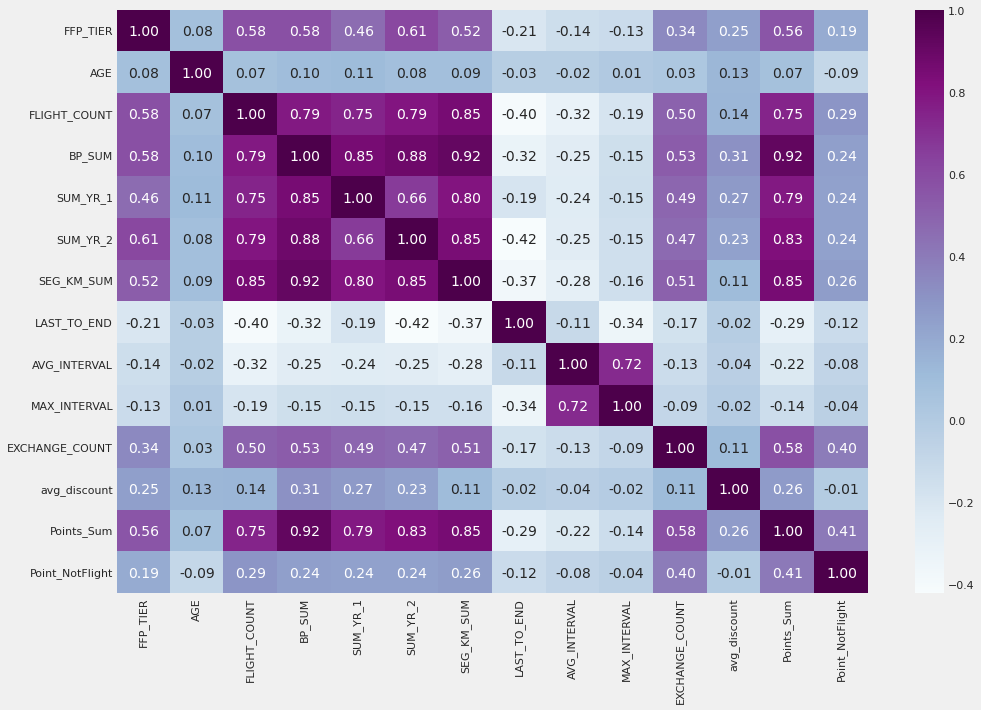

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = df.drop(['MEMBER_NO'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='BuPu', fmt='.2f')

Terdapat fiture yang berkorelasi tinggi dengan fiture lainnya : 
- FLIGHT COUNT 
- BP_SUM
- SUM_YR_1
- SUM_YR_2
- SEG_KM_SUM
- Points_SUM

#Data Preprocessing

## Handling Missing Values

In [ ]:
# Make table summary of missing value count with the percentage
data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,LAST_FLIGHT_DATE,421,0.668
4,AGE,420,0.667
5,SUM_YR_2,138,0.219
6,WORK_COUNTRY,26,0.041
7,GENDER,3,0.005


Dari Columns yang sudah kita buat untuk melihat missing values dan dengan menggunakan precentage, ada beberapa fiture yang mempunyai missing values, nanti kita akan melakukan handling missing values sebelum Feature selection.

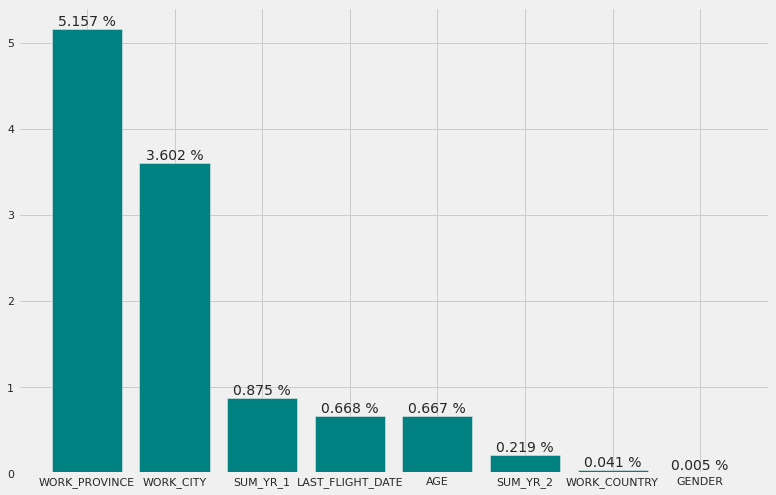

In [ ]:
# Plot in bar chart for better visualization

fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(x=data_nan['feature'], height= data_nan['percentage'], color = 'teal')

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

Dari bar plots ini kita dapat melihat missing values yang ada pada case 'flight' ini 
1. precentage missing value pada WORK_PROVINCE : 5.517 %
2.  precentage missing value pada WORK_CITY : 3.602 %
3.  precentage missing value pada SUM_YR_1 : 0.875 %
4.  precentage missing value pada LAST_FIGHT_DATE : 5.517 %
5.  precentage missing value pada AGE : 0.0667 %
6.  precentage missing value pada SUM_YR_2 : 0.219 %
7.  precentage missing value pada WORK_COUNTRY : 0.041 %
8.  precentage missing value pada GENDER : 0.005 %

#Drop Missing Value

In [ ]:
# Drop missing values

df = df.dropna().reset_index(drop=True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
57856,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
57857,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
57858,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


In [ ]:
# Recheck the existance of missing values

df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#semua missing values yang sudah kita check di atas sekarang sudah kita handling, dan kita drop feature yang terdapat missing value

In [ ]:
# Check rows of data after dropping missing values

df.shape

(57860, 23)

## Feature Selection based on LRMFC Model


**LRFMC indicator:**
- L = LOAD_TIME - FFP_DATE

The number of months since the member ’s membership time from the end of the observation window = end time of the observation window-time to join (unit: month).

- R = LAST_TO_END

The number of months since the customer ’s most recent flight to the end of the observation window = the time from the last flight to the end of the observation window (Unit: month).

- F = FLIGHT_COUNT

The number of times the customer took the company aircraft in the observation window = the number of flights in the observation window (unit: times]

- M = SEG_KM_SUM

The accumulated mileage of the customer in the company during the observation period = the total number of flight kilometers in the observation window (unit: km)

- C = AVG_DISCOUNT

The average value of the discount coefficients corresponding to the passengers who traveled during the observation period = average discount rate (unit: none)

In [ ]:
# make a dataframe RFMC first based on above information
df_LRFMC = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].reset_index()

# make L indicator by subtracting the values of column LOAD_TIME and FFP_DATE
# and calculate the date difference in months by dividing the result by 30
df_LRFMC['L'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30

# rename column name since we want to be seen as RFMC
df_LRFMC.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

# reorder the column to be LRFMC
ColumnsTitles = ['L', 'R', 'F', 'M', 'C']
df_LRFMC = df_LRFMC.reindex(columns=ColumnsTitles)
df_LRFMC

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692
...,...,...,...,...,...
57855,14.500000,437,2,3848,0.000000
57856,34.866667,297,2,1134,0.000000
57857,49.466667,89,4,8016,0.000000
57858,97.433333,29,2,2594,0.000000


#Handling Outlier

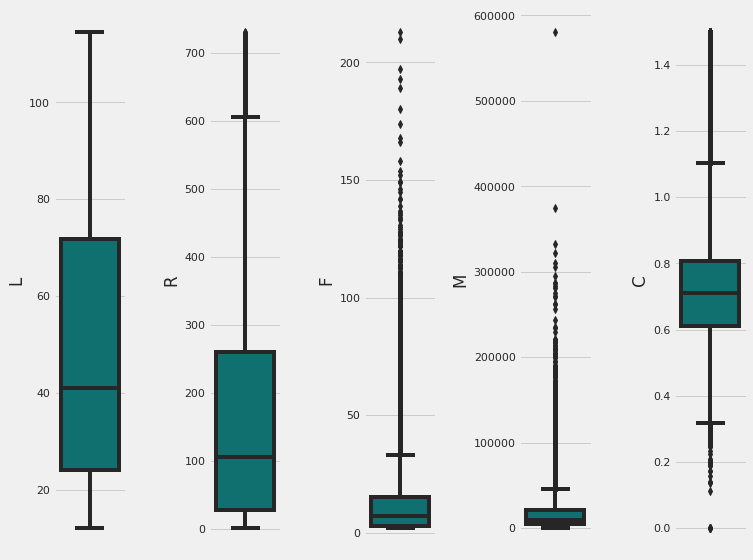

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

Terdapat Outlier pada feature 
- LAST_TO_END:R,
- FLIGHT_COUNT:F
- SEG_KM_SUM:M
- avg_discount:C

### Log Transformation to Reduce Outlier

In [ ]:
df_log_LRFMC = df_LRFMC.copy()
df_log_LRFMC['L'] = np.log10(df_LRFMC['L'] + 1)
df_log_LRFMC['R'] = np.log10(df_LRFMC['R'] + 1)
df_log_LRFMC['F'] = np.log10(df_LRFMC['F'] + 1)
df_log_LRFMC['M'] = np.log10(df_LRFMC['M'] + 1)
df_log_LRFMC['C'] = np.log10(df_LRFMC['C'] + 1)
df_log_LRFMC

,L,R,F,M,C
0,1.959995,0.301030,2.324282,5.763965,0.292619
1,1.945304,1.079181,2.133539,5.452879,0.353084
2,1.840315,1.991226,1.380211,5.449227,0.320327
3,1.789110,0.778151,2.184691,5.491262,0.294611
4,1.879096,1.903090,1.968483,5.469212,0.293957
...,...,...,...,...,...
57855,1.190332,2.641474,0.477121,3.585348,0.000000
57856,1.554691,2.474216,0.477121,3.054996,0.000000
57857,1.703005,1.954243,0.698970,3.904012,0.000000
57858,1.993142,1.477121,0.477121,3.414137,0.000000


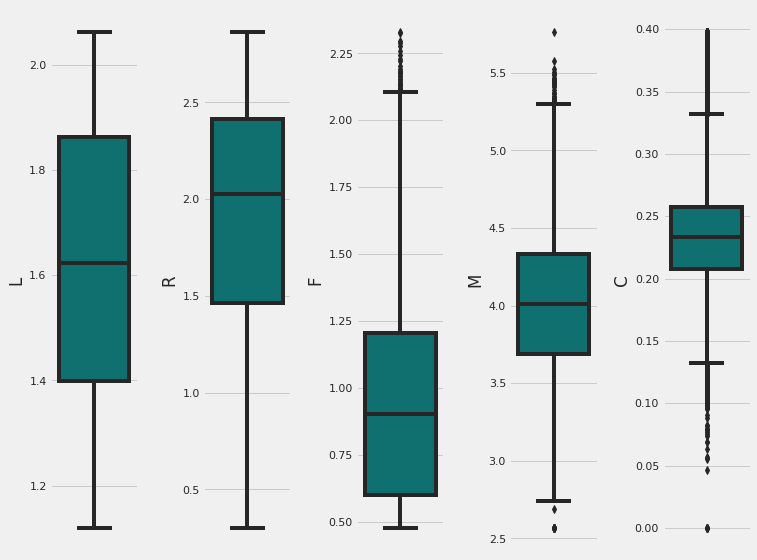

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_log_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_log_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

### Remove Outlier based on IQR

In [ ]:
# Define IQR = Q3 - Q1
IQR = df_log_LRFMC.quantile(0.75) - df_log_LRFMC.quantile(0.25)
# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_log_LRFMC.quantile(0.75) + 1.5 * IQR
# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_log_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'rows before IQR outlier filter: {len(df_log_LRFMC)}')

# Filter data between the limits
df_IQR_LRFMC = df_log_LRFMC.copy()
df_IQR_LRFMC = df_log_LRFMC[(df_log_LRFMC >= lower_limit) & (df_log_LRFMC <= upper_limit)]
    
# drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('rows after IQR outlier filter', len(df_IQR_LRFMC))
df_IQR_LRFMC

rows before IQR outlier filter: 57860
rows after IQR outlier filter 55220


,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55215,1.877755,2.359835,0.477121,2.752048,0.228124
55216,1.728083,2.416641,0.477121,2.954725,0.152288
55217,1.818226,2.322219,0.477121,2.956649,0.150756
55218,1.680033,2.675778,0.477121,2.921686,0.146128


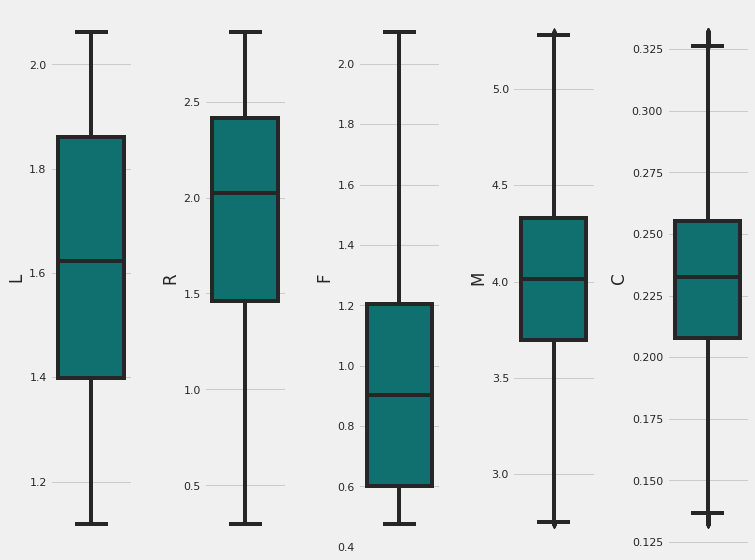

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_IQR_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_IQR_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

#Check Duplicated Value

In [ ]:
# Check duplicated value after removing outlier
df_IQR_LRFMC.duplicated().sum()

78

In [ ]:
# Drop duplicated value
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC

,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55137,1.877755,2.359835,0.477121,2.752048,0.228124
55138,1.728083,2.416641,0.477121,2.954725,0.152288
55139,1.818226,2.322219,0.477121,2.956649,0.150756
55140,1.680033,2.675778,0.477121,2.921686,0.146128


# Terdapat 78 Duplicated value dengan fiture LRFMC, pada kasus ini stiap duplicate value di remove

#Scalling

In [ ]:
# Standardize data 

std = StandardScaler().fit_transform(df_IQR_LRFMC)
df_std_LRFMC = pd.DataFrame(std, columns = list(df_IQR_LRFMC))
df_std_LRFMC

,L,R,F,M,C
0,1.638865,-0.567751,1.254030,2.899821,2.436112
1,-1.074189,-2.522903,3.064036,2.888030,2.021912
2,1.661903,-1.102449,2.233282,2.689878,2.767354
3,0.208871,-1.667148,2.739982,2.883933,1.551613
4,0.222830,-1.495477,1.515226,2.753655,2.263657
...,...,...,...,...,...
55137,0.982026,0.715355,-1.320471,-2.917142,-0.075190
55138,0.409956,0.804703,-1.320471,-2.450463,-2.157817
55139,0.754495,0.656189,-1.320471,-2.446033,-2.199887
55140,0.226301,1.212296,-1.320471,-2.526536,-2.326994


# Pada kasus ini kita menggunakan metode StandardScaler

#Clustering K-Means

###Inertia

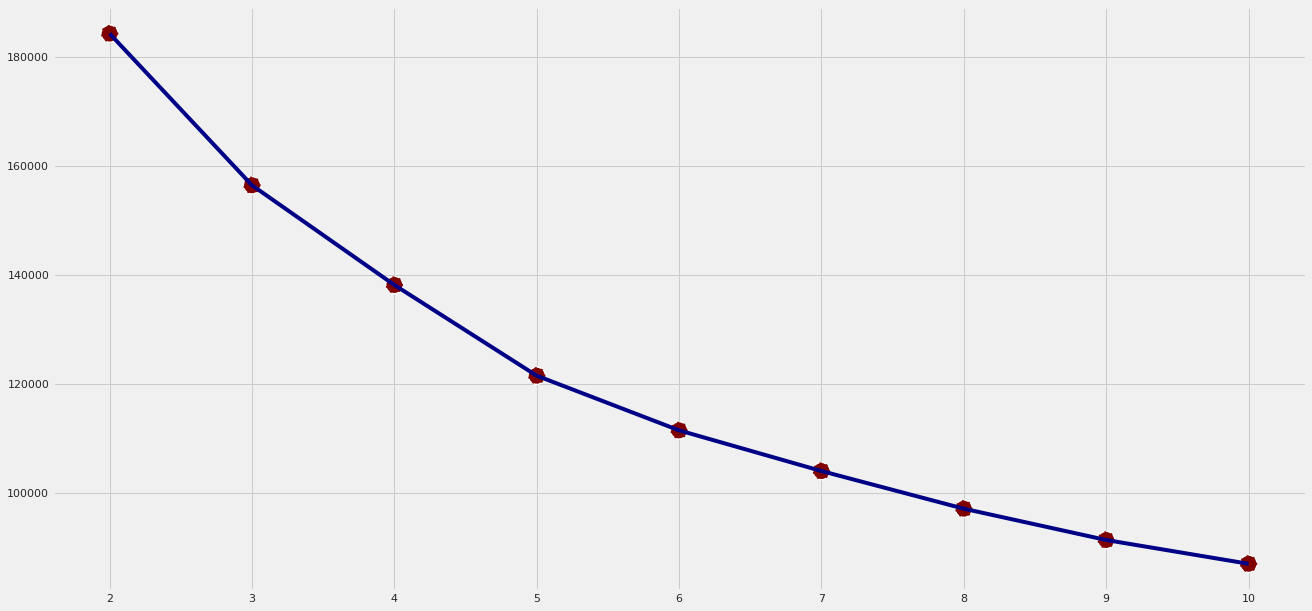

In [ ]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_LRFMC)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

### Nilai setiap titik pada elbow method memiliki nilai "siku" yang mirip , tapi nilai k=5 memilki siku yang "optimal"

## Silhouette Score

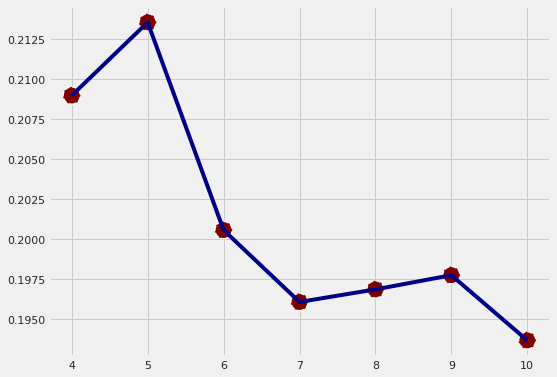

In [ ]:
# we will check for 4 - 11 cluster

range_n_clusters = list(range(4,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_LRFMC)
    preds = kmeans.predict(df_std_LRFMC)
     
    score_euclidean = silhouette_score(df_std_LRFMC, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(4,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(4,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

## K-Means Model

In [ ]:
# Create clusters using K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_std_LRFMC)

# Assign Cluster
cluster = kmeans.labels_
df_std_LRFMC['clusters'] = cluster
df_IQR_LRFMC['clusters'] = cluster
df_IQR_LRFMC.head()

,L,R,F,M,C,clusters
0,2.049606,1.544068,1.397940,5.278328,0.319568,0
1,1.339783,0.301030,2.045323,5.273207,0.304486,0
2,2.055633,1.204120,1.748188,5.187151,0.331630,0
3,1.675473,0.845098,1.929419,5.271428,0.287361,0
4,1.679125,0.954243,1.491362,5.214849,0.313289,0


In [ ]:
df_std_LRFMC.head()

,L,R,F,M,C,clusters
0,1.638865,-0.567751,1.254030,2.899821,2.436112,0
1,-1.074189,-2.522903,3.064036,2.888030,2.021912,0
2,1.661903,-1.102449,2.233282,2.689878,2.767354,0
3,0.208871,-1.667148,2.739982,2.883933,1.551613,0
4,0.222830,-1.495477,1.515226,2.753655,2.263657,0


## Check Visualization using PCA & Scatter Plot

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_std_LRFMC)
pcs = pca.transform(df_std_LRFMC)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = cluster
data_pca

,PC 1,PC 2,clusters
0,3.494448,-2.726469,0
1,4.873504,-1.425746,0
2,4.039866,-3.189958,0
3,4.506677,-1.711196,0
4,3.803057,-1.892332,0
...,...,...,...
55137,-3.401020,-0.328784,4
55138,-1.868084,2.027471,2
55139,-1.784939,1.844622,2
55140,-2.062750,2.292491,2


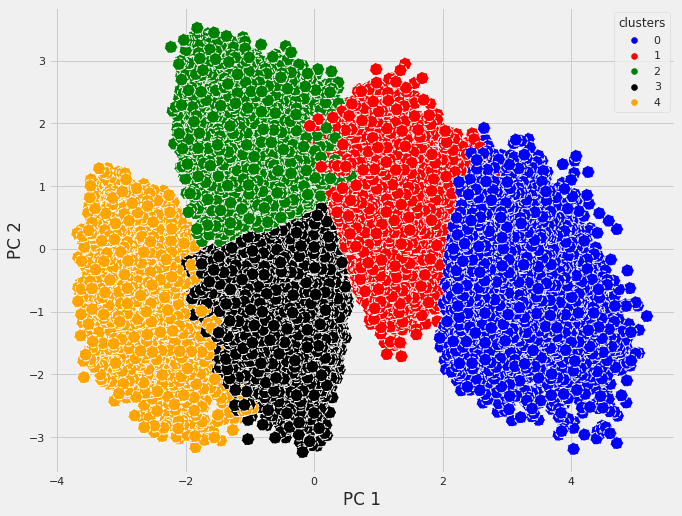

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black', 'orange'],
    s=160,
    ax=ax
)

### Visualisasi clustering dengan PCA dan nilai k=5 merupakan Jumlah cluster yang tepat 

## Analyze Using Radar Chart

In [ ]:
avg_cluster_mean = df_std_LRFMC.groupby('clusters').mean().reset_index(drop=True)
avg_cluster_mean

,L,R,F,M,C
0,0.625789,-1.153581,1.449369,1.306530,0.239086
1,-0.898017,-0.342895,0.372250,0.426270,0.011659
2,-0.428931,0.598109,-0.865739,-0.774042,-1.297467
3,0.924510,0.108036,-0.036688,0.052069,0.007135
4,-0.316506,0.763477,-0.912289,-1.012250,0.863765


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])))

fig.show()

In [ ]:
avg_cluster_med = df_std_LRFMC.groupby('clusters').median().reset_index(drop=True)
avg_cluster_med

,L,R,F,M,C
0,0.776216,-1.146535,1.391637,1.290154,0.221272
1,-0.892227,-0.211046,0.362818,0.418086,0.019532
2,-0.480612,0.744551,-0.971157,-0.771163,-1.231872
3,0.981292,0.232862,0.013504,0.063246,0.005229
4,-0.377691,0.897551,-0.971157,-0.978850,0.807453


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_med.loc[i].values.tolist() + avg_cluster_med.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_med.columns.tolist() + avg_cluster_med.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_med.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])))

fig.show()

- Cluster 0 ( Customer Group 1 )
- Cluster 1 ( Customer Group 2 )
- Cluster 2 ( Customer Group 3 )
- Cluster 3 ( Customer Group 4 )
- Cluster 4 ( Customer Group 5 )

Secara umum, cluster users terbentuk karena terdapat user yang memiliki nilai tinggi/rendah terhadap fitur 'LRFMC'

 Kita lihat bahwa dari plotly.graph yang kita Buat.
 0.  pada cluster 0 =  Kita melihat bahwa dominan ke fitur F dan fitur M dimana fitur F adalah frekuensi penerbangan , dari hasil analysis berarti cluster ini merupakan cluster yang sering melakukan penerbangan . 
 dan firut M memiliki total Mileagenya lebih banyak. jadi uang untuk membli tiket di cluster ini lebih banyakk . dan cluster ini tidak terlalu kuat untuk melihat dari sisi promo yaitu fitur C. 
 1. cluster 1 memiliki dominan hampir mirip dibawah sedikit dari cluster 0 yang dominan terhadap fitur F dan fitur M yang berarti cluster yang sering malukakn penerbangan tatapi tetap dibawah cluster 0 dan memiliki total Mileagenya yang lumayan dibawah cluster 0.
 2. Untuk cluster 2 lebih dominan ke fitur R berarti cluster ini sudah lama tidak terbang menggunakan airline
 3. cluster 3 ini merupakan user yang sudah lama karena dominan menunjukan pada fitur L yang memiliki nilai tinggi dan bisa diasumsikan user lama.
 4. Cluster 4 = Lebih dominan ke fitur C berarti mereka banyak spend money dan terbang di saat saat gencarnya promo dari airline. maka dari itu dominan juga ke fitur R berarti sudah lama tidak terbang cluster ini. 

## Analyze Mean - Median Real Data

In [ ]:
df_IQR_LRFMC.head()

,L,R,F,M,C,clusters
0,2.049606,1.544068,1.397940,5.278328,0.319568,0
1,1.339783,0.301030,2.045323,5.273207,0.304486,0
2,2.055633,1.204120,1.748188,5.187151,0.331630,0
3,1.675473,0.845098,1.929419,5.271428,0.287361,0
4,1.679125,0.954243,1.491362,5.214849,0.313289,0


In [ ]:
df_cluster = df_IQR_LRFMC.copy()
df_cluster['L'] = 10 ** df_IQR_LRFMC['L'] - 1
df_cluster['R'] = 10 ** df_IQR_LRFMC['R'] - 1
df_cluster['F'] = 10 ** df_IQR_LRFMC['F'] - 1
df_cluster['M'] = 10 ** df_IQR_LRFMC['M'] - 1
df_cluster['C'] = 10 ** df_IQR_LRFMC['C'] - 1
df_cluster

,L,R,F,M,C,clusters
0,111.100000,34.0,24.0,189813.0,1.087220,0
1,20.866667,1.0,110.0,187588.0,1.015978,0
2,112.666667,15.0,55.0,153868.0,1.146001,0
3,46.366667,6.0,84.0,186821.0,0.938031,0
4,46.766667,8.0,30.0,164001.0,1.057257,0
...,...,...,...,...,...,...
55137,74.466667,228.0,2.0,564.0,0.690922,4
55138,52.466667,260.0,2.0,900.0,0.420000,2
55139,64.800000,209.0,2.0,904.0,0.415000,2
55140,46.866667,473.0,2.0,834.0,0.400000,2


In [ ]:
display(df_cluster.groupby('clusters').agg(['mean','median']))

L                      R                 F         \
               mean     median        mean median       mean median   
clusters                                                              
0         65.503181  65.666667   26.598698   14.0  32.384100   27.0   
1         24.661076  23.400000   88.512982   58.0  12.467281   11.0   
2         36.423723  30.266667  274.542632  238.0   3.675460    3.0   
3         74.492911  74.433333  148.552908  112.0   8.613317    8.0   
4         39.087232  32.266667  323.745576  298.0   3.477771    3.0   

                     M                  C            
                  mean   median      mean    median  
clusters                                             
0         44828.602682  37953.0  0.739606  0.733479  
1         18672.256754  15867.0  0.706767  0.704405  
2          5738.858033   4830.0  0.528545  0.534635  
3         12876.017168  11127.0  0.706558  0.702362  
4          4573.088740   3924.0  0.832252  0.820805